In [1]:
train_images_dir = "/macierz/home/s165756/SPLIT1/TRAIN"
val_images_dir = "/macierz/home/s165756/SPLIT1/VAL"
test_images_dir = "/macierz/home/s165756/SPLIT1/TEST"

In [2]:
import os
import random
import numpy as np

from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(val_images_dir, target_size=(250, 250), class_mode='categorical', batch_size=64)

train_datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
train_generator = train_datagen.flow_from_directory(train_images_dir, target_size=(250, 250), class_mode='categorical', batch_size=64)

test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_images_dir, target_size=(250, 250), class_mode='categorical', batch_size=64)

Using TensorFlow backend.


Found 1505 images belonging to 5 classes.
Found 3236 images belonging to 5 classes.
Found 416 images belonging to 5 classes.


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (250,250,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 250, 250, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 96)       

In [4]:
History = model.fit_generator(train_generator, steps_per_epoch=32, validation_data=val_generator, validation_steps=16, epochs=126)


Epoch 1/126
32/32 [==============================] - 21s 643ms/step - loss: 18.5411 - accuracy: 0.2347 - val_loss: 1.6106 - val_accuracy: 0.2383
Epoch 2/126
32/32 [==============================] - 20s 621ms/step - loss: 1.5868 - accuracy: 0.2604 - val_loss: 1.6115 - val_accuracy: 0.2588
Epoch 3/126
32/32 [==============================] - 19s 599ms/step - loss: 1.5745 - accuracy: 0.2954 - val_loss: 1.6252 - val_accuracy: 0.2276
Epoch 4/126
32/32 [==============================] - 20s 618ms/step - loss: 1.5413 - accuracy: 0.3276 - val_loss: 1.6159 - val_accuracy: 0.2471
Epoch 5/126
32/32 [==============================] - 20s 620ms/step - loss: 1.5057 - accuracy: 0.3361 - val_loss: 1.6213 - val_accuracy: 0.2306
Epoch 6/126
32/32 [==============================] - 19s 592ms/step - loss: 1.4721 - accuracy: 0.3752 - val_loss: 1.6294 - val_accuracy: 0.2356
Epoch 7/126
32/32 [==============================] - 20s 619ms/step - loss: 1.5187 - accuracy: 0.3252 - val_loss: 1.6705 - val_accuracy

32/32 [==============================] - 19s 596ms/step - loss: 0.7709 - accuracy: 0.6881 - val_loss: 3.8578 - val_accuracy: 0.2367
Epoch 58/126
32/32 [==============================] - 20s 623ms/step - loss: 0.7547 - accuracy: 0.7046 - val_loss: 4.4073 - val_accuracy: 0.2412
Epoch 59/126
32/32 [==============================] - 20s 624ms/step - loss: 0.7622 - accuracy: 0.7238 - val_loss: 4.0996 - val_accuracy: 0.2286
Epoch 60/126
32/32 [==============================] - 19s 596ms/step - loss: 0.7364 - accuracy: 0.7114 - val_loss: 6.1313 - val_accuracy: 0.2437
Epoch 61/126
32/32 [==============================] - 20s 624ms/step - loss: 0.7362 - accuracy: 0.7173 - val_loss: 5.3546 - val_accuracy: 0.2324
Epoch 62/126
32/32 [==============================] - 20s 617ms/step - loss: 0.7221 - accuracy: 0.7243 - val_loss: 3.7225 - val_accuracy: 0.2487
Epoch 63/126
32/32 [==============================] - 19s 590ms/step - loss: 0.7269 - accuracy: 0.7252 - val_loss: 4.2003 - val_accuracy: 0.232

32/32 [==============================] - 20s 625ms/step - loss: 0.6196 - accuracy: 0.7658 - val_loss: 2.7032 - val_accuracy: 0.1601
Epoch 114/126
32/32 [==============================] - 19s 603ms/step - loss: 0.5353 - accuracy: 0.7969 - val_loss: 2.9793 - val_accuracy: 0.1803
Epoch 115/126
32/32 [==============================] - 20s 610ms/step - loss: 0.6065 - accuracy: 0.7748 - val_loss: 2.7981 - val_accuracy: 0.1777
Epoch 116/126
32/32 [==============================] - 19s 607ms/step - loss: 0.5565 - accuracy: 0.7960 - val_loss: 2.1999 - val_accuracy: 0.1732
Epoch 117/126
32/32 [==============================] - 19s 594ms/step - loss: 0.5289 - accuracy: 0.8003 - val_loss: 2.2875 - val_accuracy: 0.1712
Epoch 118/126
32/32 [==============================] - 20s 612ms/step - loss: 0.5590 - accuracy: 0.7842 - val_loss: 4.0918 - val_accuracy: 0.1797
Epoch 119/126
32/32 [==============================] - 20s 624ms/step - loss: 0.5119 - accuracy: 0.8084 - val_loss: 2.5742 - val_accuracy:

In [5]:
scores = model.evaluate_generator(test_generator, steps=24)
print("Accuracy = ", scores[1])

Accuracy =  0.8444444537162781


In [6]:
import matplotlib.pyplot as plt

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss for 126 epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

<Figure size 640x480 with 1 Axes>

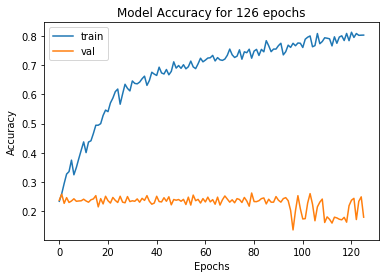

In [7]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy for 126 epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model.save('szum-model-split2.h5')